<a href="https://colab.research.google.com/github/allertsa/my-data-analyst-portfolio/blob/main/E_commerce_Dataset_Cleaning_on_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
def silhoutte_analysis(data,cluster=[2,3,4]):
    X = data.to_numpy()

    range_n_clusters = cluster

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

In [3]:
from google.colab import files
uploaded = files.upload()

Saving customers.csv to customers.csv
Saving orders.csv to orders.csv
Saving products.csv to products.csv
Saving sales.csv to sales.csv


In [4]:
import io
orders_df = pd.read_csv(io.BytesIO(uploaded['orders.csv']))
sales_df = pd.read_csv(io.BytesIO(uploaded['sales.csv']))
customers_df = pd.read_csv(io.BytesIO(uploaded['customers.csv']))
products_df = pd.read_csv(io.BytesIO(uploaded['products.csv']))

In [5]:
combined = pd.merge(orders_df,sales_df,left_on='order_id',right_on='order_id')
combined = combined.merge(products_df,left_on='product_id',right_on='product_ID')
combined = combined.merge(customers_df,on='customer_id')
combined.head(10)

,order_id,customer_id,payment,order_date,delivery_date,sales_id,product_id,price_per_unit,quantity_x,total_price,...,quantity_y,description,customer_name,gender,age,home_address,zip_code,city,state,country
0,1,64,30811,2021-8-30,2021-09-24,0,218,106,2,212,...,44,"A orange coloured, L sized, Chambray Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
1,1,64,30811,2021-8-30,2021-09-24,1,481,118,1,118,...,62,"A indigo coloured, S sized, Puffer Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
2,1,64,30811,2021-8-30,2021-09-24,2,2,96,3,288,...,54,"A red coloured, M sized, Oxford Cloth Shirt",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
3,1,64,30811,2021-8-30,2021-09-24,3,1002,106,2,212,...,52,"A blue coloured, M sized, Wool Trousers",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
4,1,64,30811,2021-8-30,2021-09-24,4,691,113,3,339,...,53,"A indigo coloured, S sized, Parka Jacket",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
5,1,64,30811,2021-8-30,2021-09-24,5,981,106,3,318,...,65,"A red coloured, S sized, Wool Trousers",Annabella Devote,Genderfluid,75,4927 Alice MeadowApt. 960,7787,Sanfordborough,South Australia,Australia
6,233,996,29939,2021-9-3,2021-09-19,1129,218,106,3,318,...,44,"A orange coloured, L sized, Chambray Shirt",Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia
7,169,996,22089,2021-3-9,2021-03-12,811,605,112,2,224,...,46,"A yellow coloured, XS sized, Cardigan Jacket",Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia
8,169,996,22089,2021-3-9,2021-03-12,810,928,96,2,192,...,43,"A green coloured, L sized, Drawstring Trousers",Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia
9,233,996,29939,2021-9-3,2021-09-19,1132,701,119,3,357,...,54,"A red coloured, S sized, Trench Coat Jacket",Elvira Sarfati,Agender,59,0433 Armstrong HillSuite 974,7613,Lake Danielland,Tasmania,Australia


In [6]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   customer_id     5000 non-null   int64 
 2   payment         5000 non-null   int64 
 3   order_date      5000 non-null   object
 4   delivery_date   5000 non-null   object
 5   sales_id        5000 non-null   int64 
 6   product_id      5000 non-null   int64 
 7   price_per_unit  5000 non-null   int64 
 8   quantity_x      5000 non-null   int64 
 9   total_price     5000 non-null   int64 
 10  product_ID      5000 non-null   int64 
 11  product_type    5000 non-null   object
 12  product_name    5000 non-null   object
 13  size            5000 non-null   object
 14  colour          5000 non-null   object
 15  price           5000 non-null   int64 
 16  quantity_y      5000 non-null   int64 
 17  description     5000 non-null   object
 18  customer

In [7]:
#converting data types from string to timeseries

combined['order_date'] = pd.to_datetime(combined['order_date'])

combined['delivery_date'] = pd.to_datetime(combined['delivery_date'])

#converting data type from int to string

combined['order_id'] = combined['order_id'].astype(str)

combined['customer_id'] = combined['customer_id'].astype(str)

combined['sales_id'] = combined['sales_id'].astype(str)

combined['payment'] = combined['payment'].astype(str)

combined['product_id'] = combined['product_id'].astype(str)

combined['zip_code'] = combined['zip_code'].astype(str)

combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   object        
 1   customer_id     5000 non-null   object        
 2   payment         5000 non-null   object        
 3   order_date      5000 non-null   datetime64[ns]
 4   delivery_date   5000 non-null   datetime64[ns]
 5   sales_id        5000 non-null   object        
 6   product_id      5000 non-null   object        
 7   price_per_unit  5000 non-null   int64         
 8   quantity_x      5000 non-null   int64         
 9   total_price     5000 non-null   int64         
 10  product_ID      5000 non-null   int64         
 11  product_type    5000 non-null   object        
 12  product_name    5000 non-null   object        
 13  size            5000 non-null   object        
 14  colour          5000 non-null   object        
 15  pric

In [8]:
combined.isna().sum()

order_id          0
customer_id       0
payment           0
order_date        0
delivery_date     0
sales_id          0
product_id        0
price_per_unit    0
quantity_x        0
total_price       0
product_ID        0
product_type      0
product_name      0
size              0
colour            0
price             0
quantity_y        0
description       0
customer_name     0
gender            0
age               0
home_address      0
zip_code          0
city              0
state             0
country           0
dtype: int64

In [9]:
combined.duplicated().sum()

0

In [10]:
combined.drop(labels='product_ID',axis=1,inplace=True)

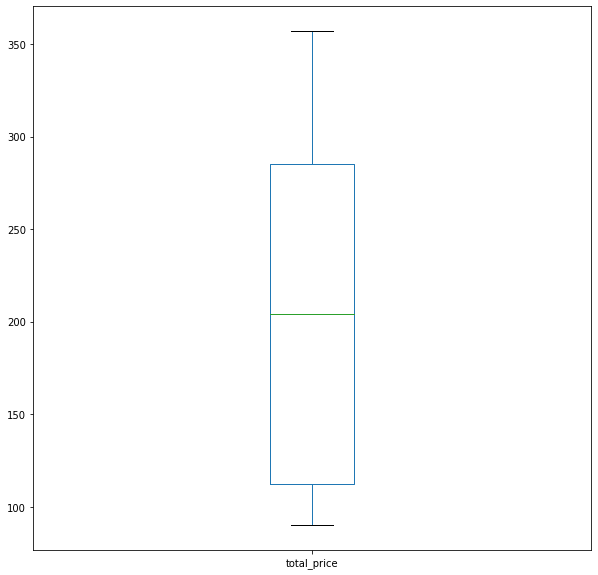

In [11]:
combined.boxplot(column='total_price', fontsize=10, rot=0, grid=False, figsize=(10, 10))

In [12]:
check = combined[['order_id','customer_id','price_per_unit','price']]
check

,order_id,customer_id,price_per_unit,price
0,1,64,106,105
1,1,64,118,110
2,1,64,96,114
3,1,64,106,111
4,1,64,113,119
...,...,...,...,...
4995,522,761,107,92
4996,690,941,96,104
4997,690,941,107,92
4998,690,941,105,93
